In [2]:
import sys
sys.path.append('/global/homes/c/cpopik/')
from Basics import *
setplot(dark=True)

In [ ]:
# NERSC location: "/global/cfs/projectdirs/act/data/act_dr5/s08s18_coadd/auxilliary/"
datapath = "/global/homes/c/cpopik/CAPPIBARAS/Data/"

dr5_150, dr5_090 = {}, {}
dr5_150['ellsb'], dr5_150['beam'] = np.genfromtxt(f"{datapath}/ACTDR5/beams/act_planck_dr5.01_s08s18_f150_daynight_beam.txt").T
dr5_090['ellsb'], dr5_090['beam'] = np.genfromtxt(f"{datapath}/ACTDR5/beams/act_planck_dr5.01_s08s18_f090_daynight_beam.txt").T

In [109]:
FWHM = 1.6 * u.arcmin.to(u.rad)
sigma = FWHM/np.sqrt(8*np.log(2))
gaussbeam = lambda ells: np.exp(-ells*(ells+1)*sigma**2/2)

In [181]:
ViewDataOrganization(bpath)

No README file
/global/cfs/projectdirs/act/data/act_dr6v4/beams/daytime_beams//                                        (52 MB) 24 Files
     beam_full_pa4_f220_daydeep_modes.txt                                                                     (6 MB)
     beam_full_pa6_f090_daywide_modes.txt                                                                     (3 MB)
     beam_full_pa5_f090_daydeep_beam.txt                                                                      (1 MB)
     beam_full_pa4_f150_daywide_beam.txt                                                                      (1 MB)
     beam_full_pa5_f150_daydeep_beam.txt                                                                      (1 MB)
     beam_full_pa6_f090_daywide_beam.txt                                                                      (1 MB)
     beam_full_pa6_f090_daydeep_modes.txt                                                                     (3 MB)
     beam_full_pa5_f090_daywide_modes.txt    

In [ ]:
bpath ="/global/cfs/projectdirs/act/data/act_dr6v4/beams/daytime_beams/"
# Also "/global/cfs/projectdirs/act/data/act_dr6v4/to_nersc/dr6.02/beams/daytime_beams"

dr6_150, dr6_090 = {}, {}
dr6_150['ellsb'], dr6_150['beamday'], dr6_150['beamdayerr'],  dr6_150['beamnight'], dr6_150['beamnighterr'], dr6_150['???'] =  np.genfromtxt(bpath+"/beam_full_pa6_f150_daywide_beam.txt").T
dr6_090['ellsb'], dr6_090['beamday'], dr6_090['beamdayerr'],  dr6_090['beamnight'], dr6_090['beamnighterr'], dr6_090['???'] =  np.genfromtxt(bpath+"/beam_full_pa6_f090_daywide_beam.txt").T

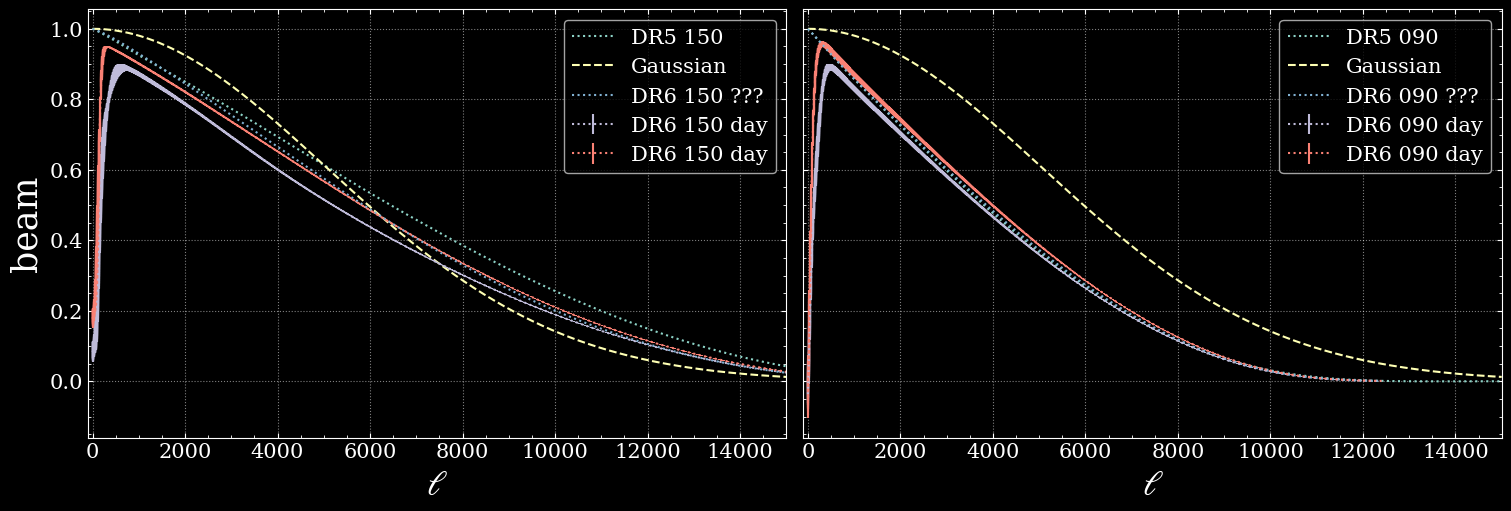

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained', sharex=True, sharey=True)

axs[0].plot(dr5_150['ellsb'], dr5_150['beam'], label='DR5 150', ls=':')
axs[1].plot(dr5_090['ellsb'], dr5_090['beam'], label='DR5 090', ls=':')

axs[0].plot(dr5_150['ellsb'], gaussbeam(dr5_150['ellsb']), label='Gaussian', ls='--')
axs[1].plot(dr5_150['ellsb'], gaussbeam(dr5_090['ellsb']), label='Gaussian', ls='--')

axs[0].errorbar(dr6_150['ellsb'], dr6_150['beamday'], dr6_150['beamdayerr'], label='DR6 150 day', ls=':')
axs[1].errorbar(dr6_090['ellsb'], dr6_090['beamday'], dr6_090['beamdayerr'], label='DR6 090 day', ls=':')

axs[0].errorbar(dr6_150['ellsb'], dr6_150['beamnight'], dr6_150['beamnighterr'], label='DR6 150 day', ls=':')
axs[1].errorbar(dr6_090['ellsb'], dr6_090['beamnight'], dr6_090['beamnighterr'], label='DR6 090 day', ls=':')

axs[0].plot(dr6_150['ellsb'], dr6_150['???'], label='DR6 150 ???', ls=':')
axs[1].plot(dr6_090['ellsb'], dr6_090['???'], label='DR6 090 ???', ls=':')


# axs[0].plot(daytime150[0], daytime150[1], alpha=0.7, label=f'Daytime 090')
# axs[0].plot(daytime150[0], daytime150[3], alpha=0.7, label=f'Nighttime 150')
# axs[0].plot(daytime150[0], daytime150[5], alpha=0.7, label=f'?')

# axs[0].plot(daytime90[0], daytime90[1], alpha=0.7, label=f'Daytime 090')
# axs[0].plot(daytime90[0], daytime90[3], alpha=0.7, label=f'Nighttime 150')
# axs[0].plot(daytime90[0], daytime90[5], alpha=0.7, label=f'?')

axs[0].set(xlabel=(r'$\ell$'), ylabel=r'beam', xlim=(-100, 15000)), axs[0].legend()
axs[1].set(xlabel=(r'$\ell$')), axs[1].legend()
plt.show()

In [50]:
datapath = "/global/homes/c/cpopik/CAPPIBARAS/Data/"

dr5_150['ellsr'], dr5_150['respI'], dr5_150['respIerr'], dr5_150['respQ'], dr5_150['respQerr'], dr5_150['respU'] , dr5_150['respUerr'] = np.genfromtxt(f"{datapath}/ACTDR5/responses/act_planck_dr5.01_s08s18_AA_f150_daynight_response_tsz.txt").T
dr5_090['ellsr'], dr5_090['respI'], dr5_090['respIerr'], dr5_090['respQ'], dr5_090['respQerr'], dr5_090['respU'] , dr5_090['respUerr'] = np.genfromtxt(f"{datapath}/ACTDR5/responses/act_planck_dr5.01_s08s18_AA_f090_daynight_response_tsz.txt").T

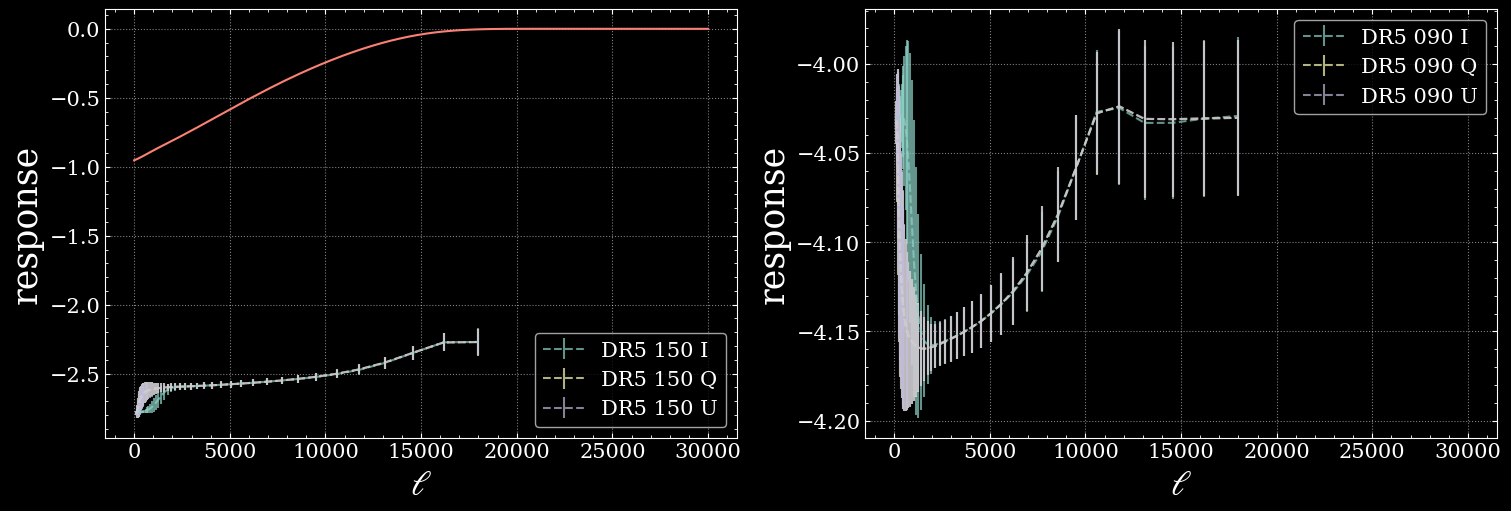

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained', sharex=True)


axs[0].errorbar(dr5_150['ellsr'], dr5_150['respI'], dr5_150['respIerr'], alpha=0.7, ls='--', label='DR5 150 I')
axs[0].errorbar(dr5_150['ellsr'], dr5_150['respQ'], dr5_150['respQerr'], alpha=0.7, ls='--', label='DR5 150 Q')
axs[0].errorbar(dr5_150['ellsr'], dr5_150['respU'], dr5_150['respUerr'], alpha=0.7, ls='--', label='DR5 150 U')
axs[1].errorbar(dr5_090['ellsr'], dr5_090['respI'], dr5_090['respIerr'], alpha=0.7, ls='--', label='DR5 090 I')
axs[1].errorbar(dr5_090['ellsr'], dr5_090['respQ'], dr5_090['respQerr'], alpha=0.7, ls='--', label='DR5 090 Q')
axs[1].errorbar(dr5_090['ellsr'], dr5_090['respU'], dr5_090['respUerr'], alpha=0.7, ls='--', label='DR5 090 U')

axs[0].plot(dr5_150['ellsb'], resp0*dr5_150['beam'])

axs[0].set(xlabel=(r'$\ell$'), ylabel=r'response'), axs[0].legend()
axs[1].set(xlabel=(r'$\ell$'), ylabel=r'response'), axs[1].legend()
plt.show()

In [108]:
gaussbeam

array([1.00000000e+00, 9.99999961e-01, 9.99999883e-01, ...,
       2.32480682e-08, 2.32208402e-08, 2.31936432e-08])

In [76]:
ViewDataOrganization("/global/cfs/projectdirs/act/data/act_dr5/s08s18_coadd/auxilliary/")

No README file
/global/cfs/projectdirs/act/data/act_dr5/s08s18_coadd/auxilliary//                                      (11 MB) 3 Dirs
     responses/                                                                                               (1 MB) 48 Files
     act_planck_dr5.01_s08s18_fullivar_info.txt                                                               (1 MB)
     act_planck_dr5.01_s08s18_bandpasses_scaledep.hdf                                                         (5 MB)
     beams/                                                                                                   (5 MB) 6 Files
     band_centers/                                                                                            (1 MB) 48 Files
     act_planck_dr5.01_s08s18_bandpasses.txt                                                                  (1 MB)


In [ ]:
dr5bandpass = np.genfromtxt("/global/cfs/projectdirs/act/data/act_dr5/s08s18_coadd/auxilliary/act_planck_dr5.01_s08s18_bandpasses.txt").T

def dB_dT(nu, T_CMB=2.7255):
    x = ((nu*u.GHz)*c.h/c.k_B/(T_CMB*u.K)).decompose()
    return ((2*c.h*(nu*u.GHz)**3/c.c**2)).to(u.kJy).value * x/T_CMB * np.exp(x)/(np.exp(x)-1)**2
        
def fnu(freq, T_CMB=2.7255, **kwargs):
    x = (c.h * freq*u.GHz / (c.k_B * T_CMB*u.K)).decompose().value
    ans = x / np.tanh(x / 2.0) - 4.0
    return ans

resp0 = np.trapz(fnu(dr5bandpass[0])*dB_dT(dr5bandpass[0])*dr5bandpass[1], dr5bandpass[0])/np.trapz(dB_dT(dr5bandpass[0])*dr5bandpass[1], dr5bandpass[0])
plt.plot(dr5_150['ellsb'], resp0*dr5_150['beam'])

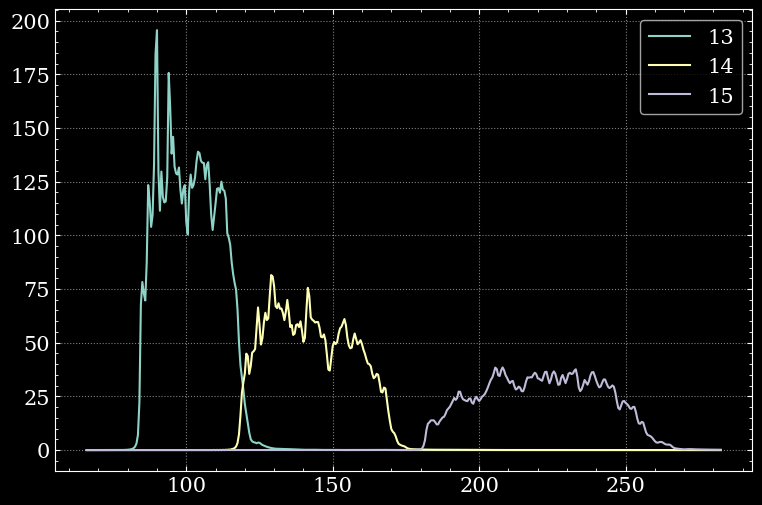

In [ ]:
# plt.plot(dr5bandpass[0], dr5bandpass[3], label='3')
# plt.plot(dr5bandpass[0], dr5bandpass[7], label='7')
# plt.plot(dr5bandpass[0], dr5bandpass[9], label='9')
plt.plot(dr5bandpass[0], dr5bandpass[13], label='13')

# plt.plot(dr5bandpass[0], dr5bandpass[1], label='1')
# plt.plot(dr5bandpass[0], dr5bandpass[2], label='2')
# plt.plot(dr5bandpass[0], dr5bandpass[4], label='4')
# plt.plot(dr5bandpass[0], dr5bandpass[5], label='5')
# plt.plot(dr5bandpass[0], dr5bandpass[8], label='8')
# plt.plot(dr5bandpass[0], dr5bandpass[10], label='10')
# plt.plot(dr5bandpass[0], dr5bandpass[11], label='11')
plt.plot(dr5bandpass[0], dr5bandpass[14], label='14')

# plt.plot(dr5bandpass[0], dr5bandpass[6], label='6')
# plt.plot(dr5bandpass[0], dr5bandpass[12], label='12')
plt.plot(dr5bandpass[0], dr5bandpass[15], label='15')


plt.legend(); plt.show()

In [142]:
ViewDataOrganization("/global/cfs/projectdirs/act/data/act_dr6v4/beams", levels=2)

ACT DR6.02 beams

*** Main beams ***

Harmonic beam profiles for the DR6.02 nighttime maps and selected nighttime null test maps.

The files are formatted as follows:

{split_type}_{array}_{freq}_night_beam_tform_{beam_type}.txt

"split_type" is either "coadd" or "set{0..3}". The sets refer to the four independent
noise splits of the dr6.02 maps. The "coadd" split_type is a weighted average of the
per-split beams. The "coadd" beam is used for the power spectrum likelihood. The "coadd" beam
should be sufficient for most analyses, the per-split beams deviate by less than 1% from the
coaddded beam for multipoles < 10_000.

"beam_type" refers to either "instant", "jitter_cmb" or "jitter_mono". The "jitter_cmb" type
is the beam estimate after the CMB color-correction and the jitter correction have been applied.
This beam is most appropriate for the CMB signal in the DR6.02 maps. The "instant" beam
is the instantenous beam, i.e. the beam estimate before the CMB color-correction and jitter
co

In [74]:
ViewDataOrganization("/global/cfs/projectdirs/act/data/act_dr6v4/", levels=2, info=False)

No README file
/global/cfs/projectdirs/act/data/act_dr6v4//                                                                    10 Dirs
     maps/                                                                                                           1 Dirs
          HISTORY_maps.txt                                                                                               
          README_maps.txt                                                                                                
          published/                                                                                                      2614 Files
     nilc/                                                                                                           2 Dirs
          .ipynb_checkpoints/                                                                                             1 Files
          README_nilc.txt                                                                                     

          depth1_maps/                                                                                                    913 Dirs
          depth1_index.txt                                                                                               
          README_depth1.txt                                                                                              
     passbands/                                                                                                      1 Dirs
          processed/                                                                                                      6 Files
          README_passbands.txt                                                                                           
          AdvACT_color_corrections.h5                                                                                    
          AdvACT_Passbands.h5                                                                                            
     

In [ ]:
ViewDataOrganization("/global/cfs/projectdirs/act/data/act_dr6v4/beams/daytime_beams")

In [ ]:
bpath ="/global/cfs/projectdirs/act/data/act_dr6v4/beams/daytime_beams/"
thing=  np.genfromtxt(bpath+"/beam_full_pa4_f150_daywide_beam.txt").T

plt.errorbar(thing[0], thing[1], yerr=thing[2], alpha=0.7, label=f'Daytime')
plt.errorbar(thing[0], thing[3], yerr=thing[4], alpha=0.7, label=f'Nighttime')
plt.plot(thing[0], thing[5], alpha=0.7, label=f'?')


plt.legend(loc='right')

In [ ]:
bpath ="/global/cfs/projectdirs/act/data/act_dr6v4/passbands/processed"
thing = np.load(bpath+"/passband_dr6_pa4_f150.dat").T